This example shows how approximate distributions may not be unique when a system is in equilibrium. 

Note that this is a consequence of the model and not a limitation of the method because a random processes described in a model may have the same equlibrium distribution as that of another random process. Hence, we cannot uniquely determine a stochastic model from a given results set that only samples the system in equilibrium. Rather, we can only test whether a given model produces such a given results set. 

Note also that perturbed states seem to better demonstrate uniqueness, however such an approach is still insufficient to determine the model that produced a given results set. This naturally follows from the Taylor expansion. 

Probably the point to make is that our goal is not to provide a method for determining the model that produced a given results set. Rather, our goal is to test whether a given model produces a given dataset, and to make such tests possible at scale by providing guidelines, methods, tools, etc. that lead to reporting of necessary and sufficient data to perform such tests as common scientific practice. 

In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_oscillator
from stochastic_tests import Test

t_fin = 10.0
num_steps = 100

test = Test(model=model_oscillator({'t0': ('norm', (0, 1E0))}),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=False)

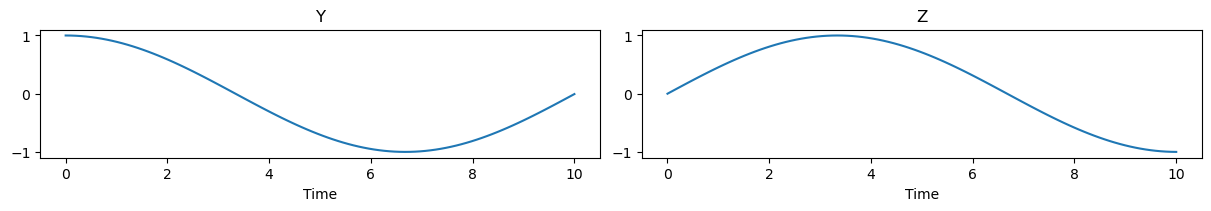

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

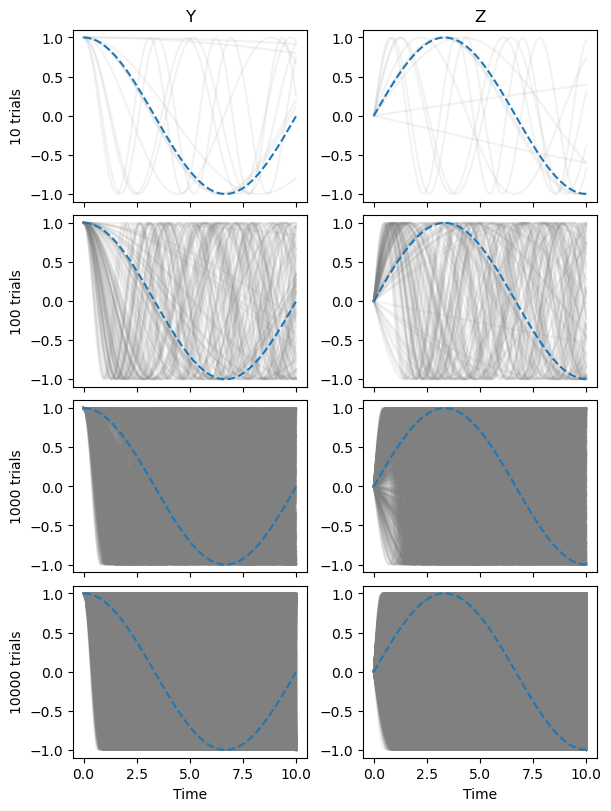

In [4]:
_ = test.plot_results_stochastic()

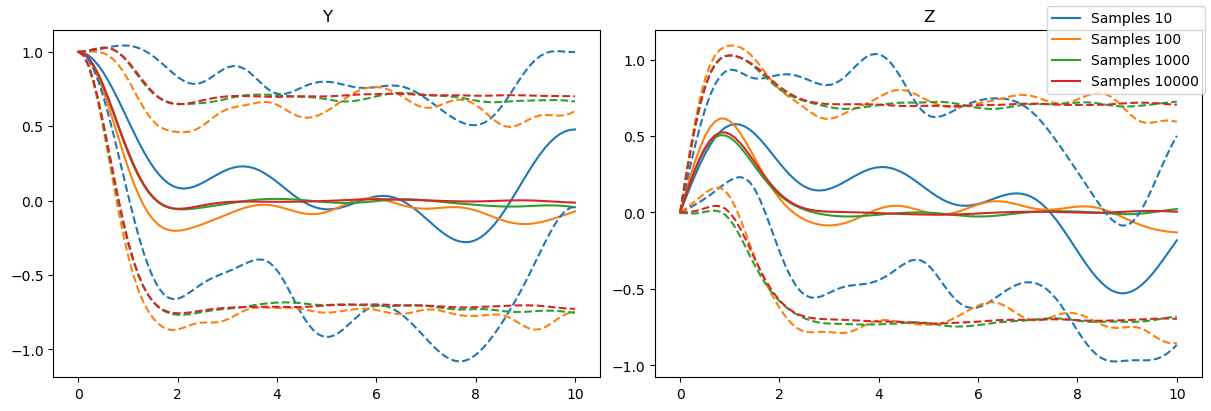

In [5]:
_ = test.plot_stats()

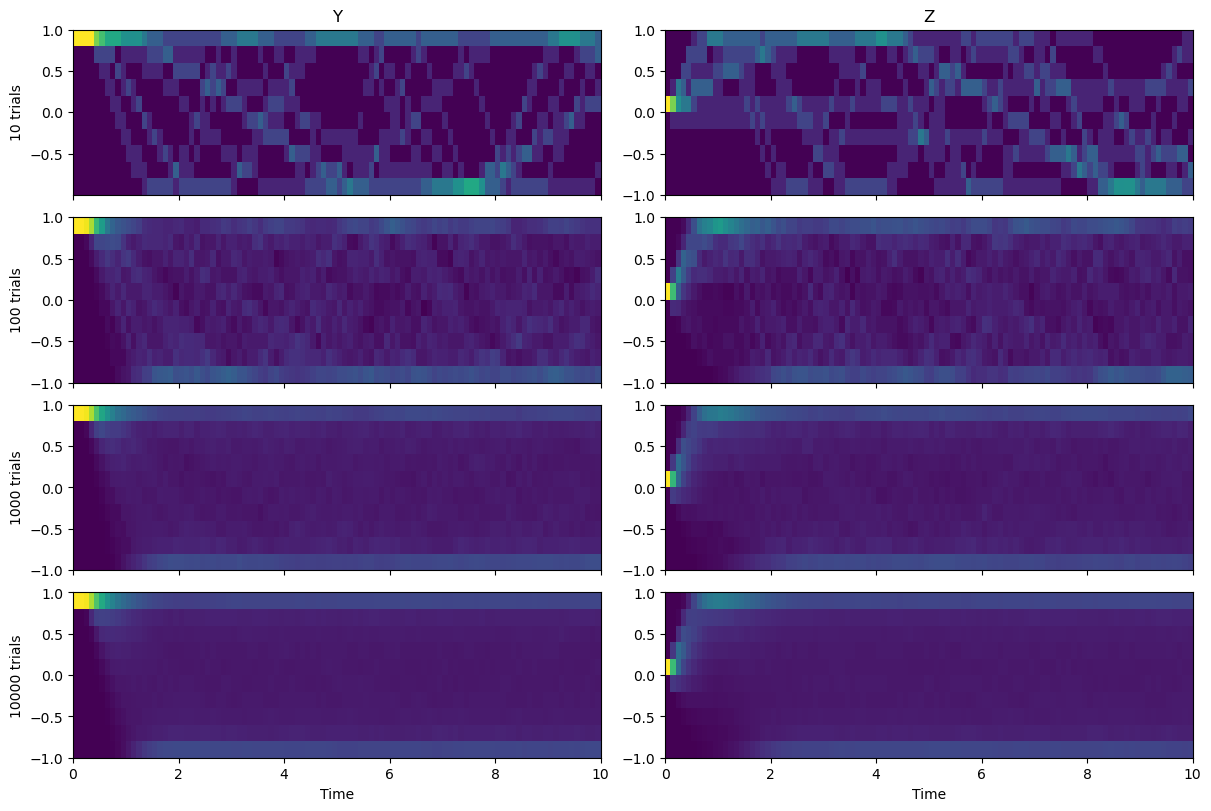

In [6]:
_ = test.plot_distributions()

Note here that as the results sets converge to reliable distributions, those distributions are (practically) the same at equilibrium. 

In [7]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = (len(test.trials) - 1) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_diff_basic(progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_basic[0.0])

In [8]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = (len(test.trials) - 1) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_diff_basic(filter=0.05, progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_basic[0.05])

In [9]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = len(test.trials) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_div_kldiv(progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_kl_div)

In [10]:
# out = ipw.Output()
# display(out)

# with out:
#     print('Analyzing correlations...')
# test.measure_correlation()
# out.clear_output()

# _ = test.plot_correlations()

In [11]:
test.find_ecfs()
test.measure_ecf_diffs()

In [12]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	Y: 1.7736598689007819
	Z: 1.718560260263693
100 trials
	Y: 0.6063937302696678
	Z: 0.6636226230322885
1000 trials
	Y: 0.20998908681881379
	Z: 0.17914423922356573
10000 trials
	Y: 0.05817228867940656
	Z: 0.05207591817144838


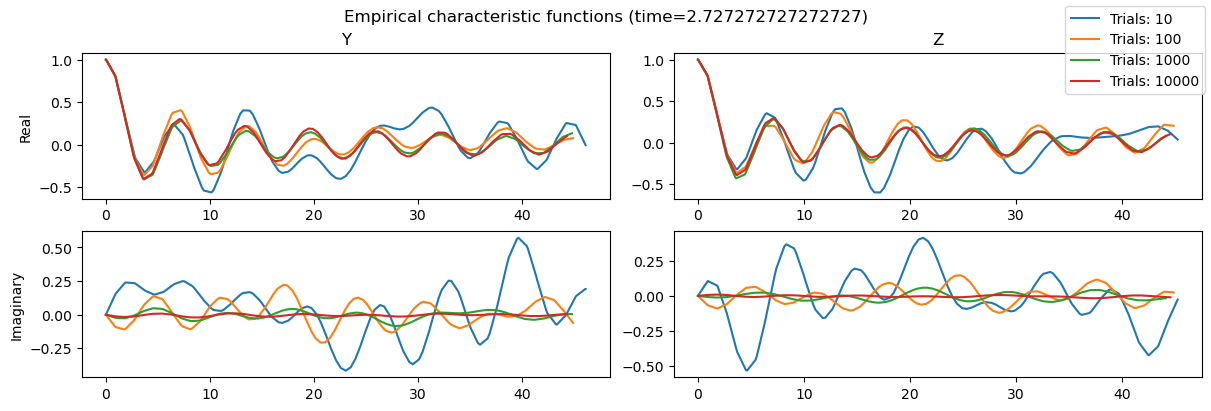

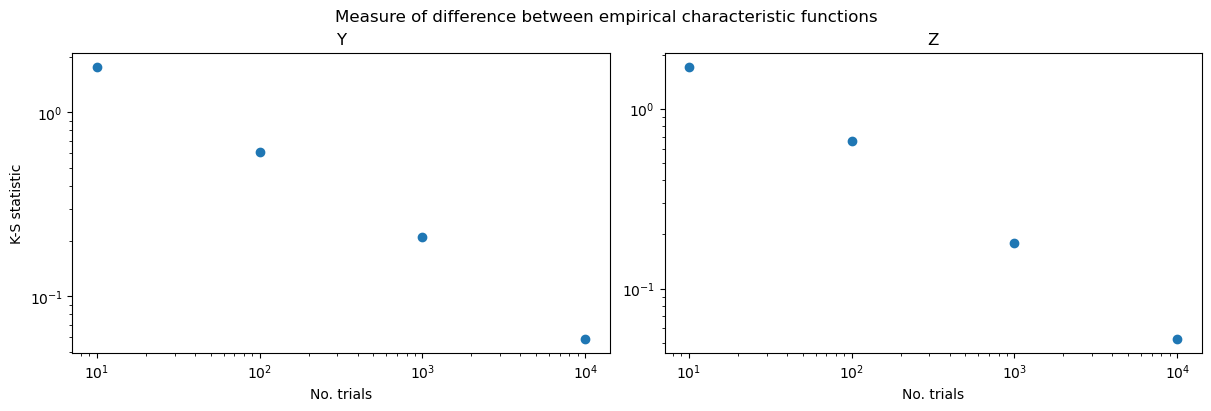

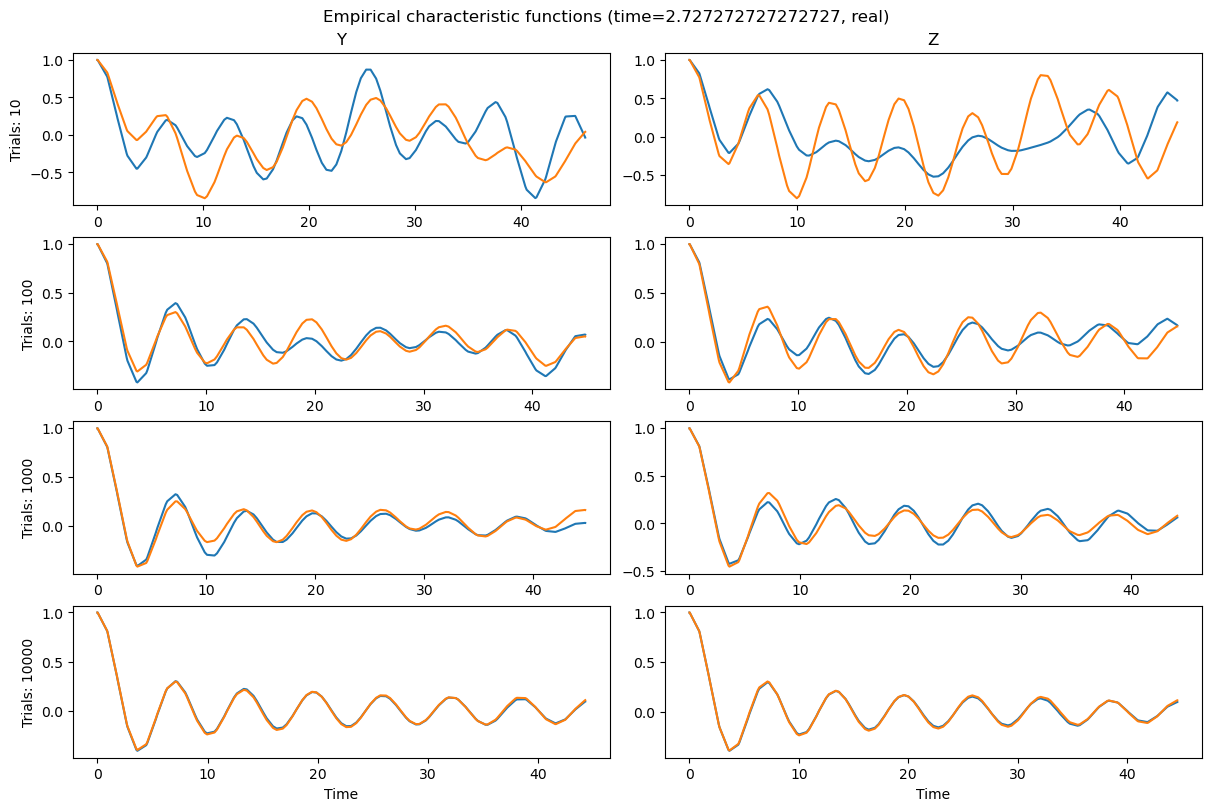

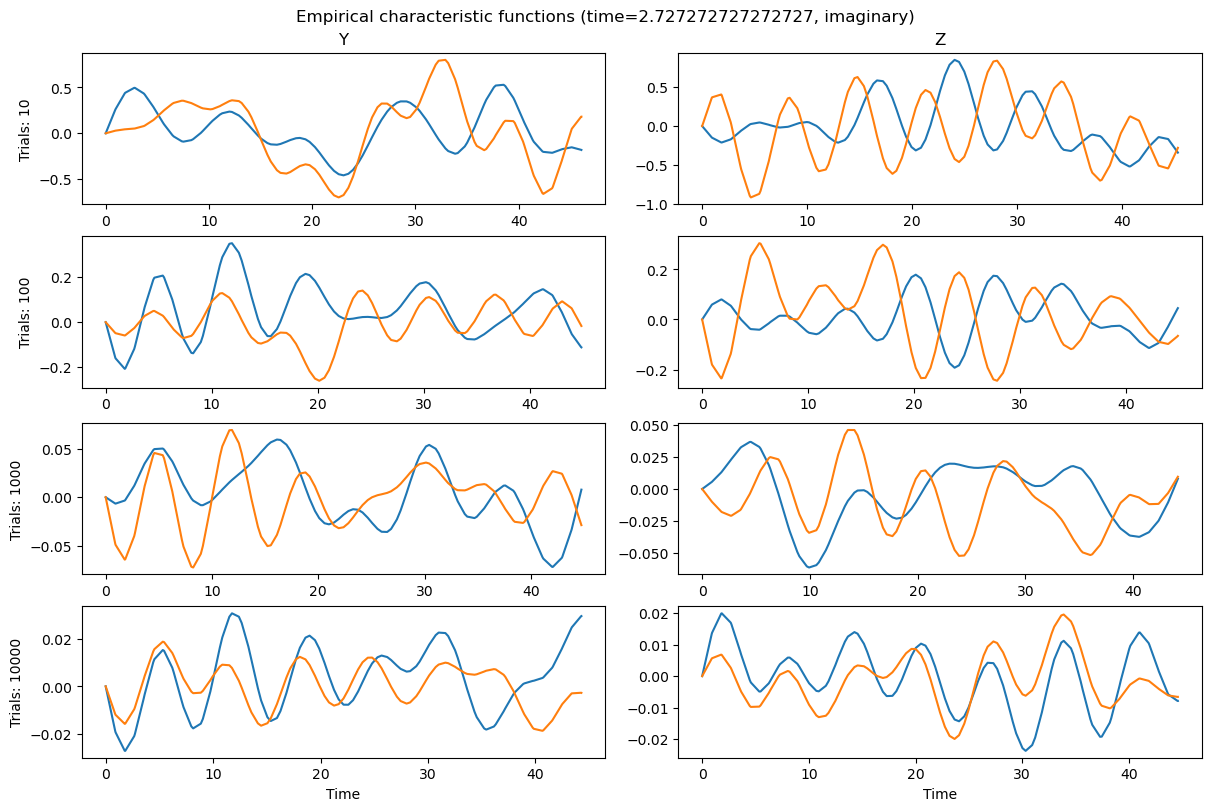

In [13]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [14]:
test.generate_ecf_diff_fits()

/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_repro.py:992: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)


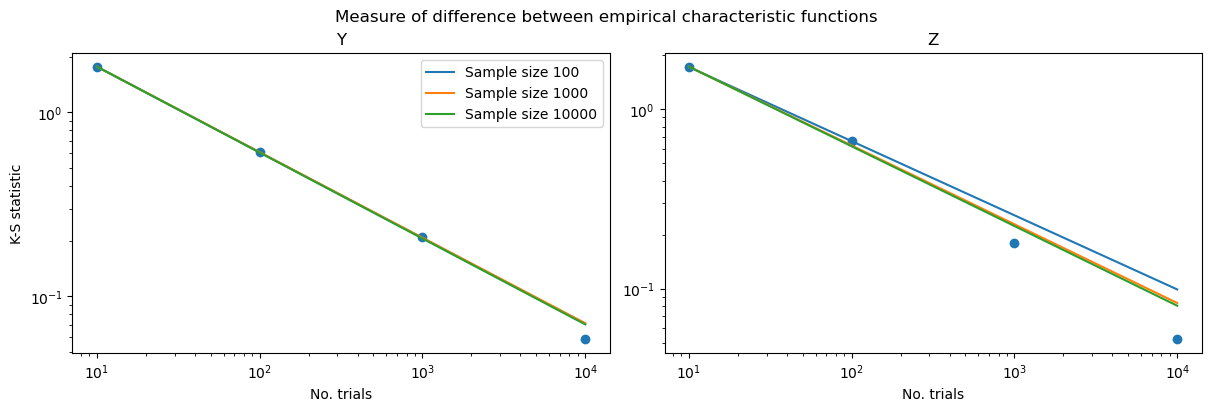

In [15]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [16]:
# Runtime: ~3 minutes (M1 max)
test.test_sampling(err_thresh=1E-3)

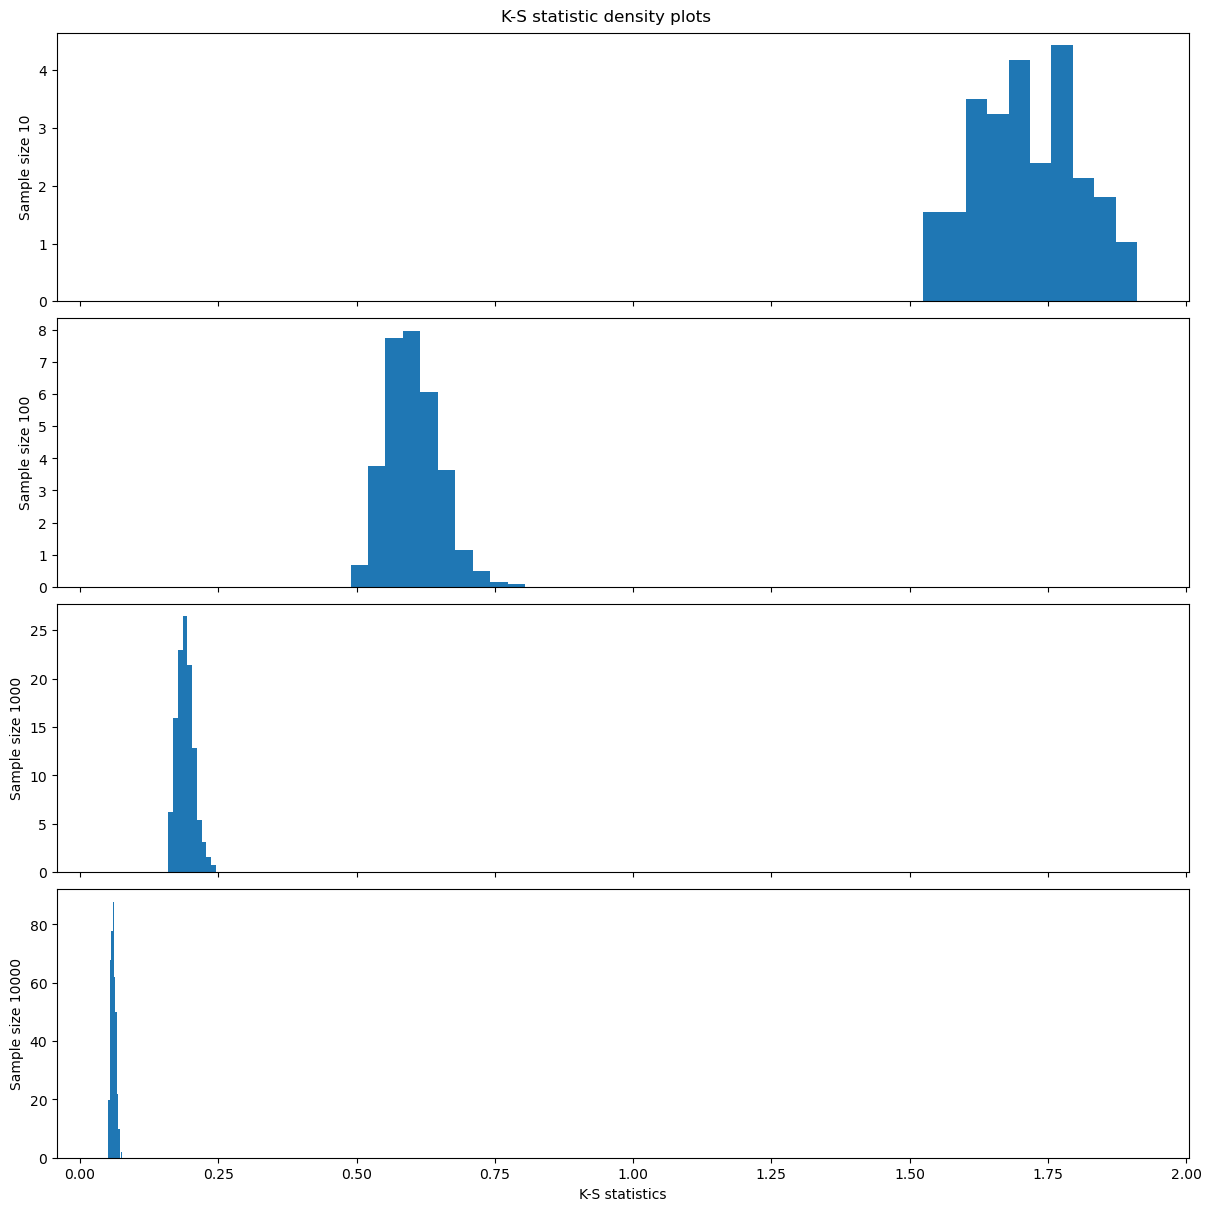

In [17]:
_ = test.plot_ks_sampling()

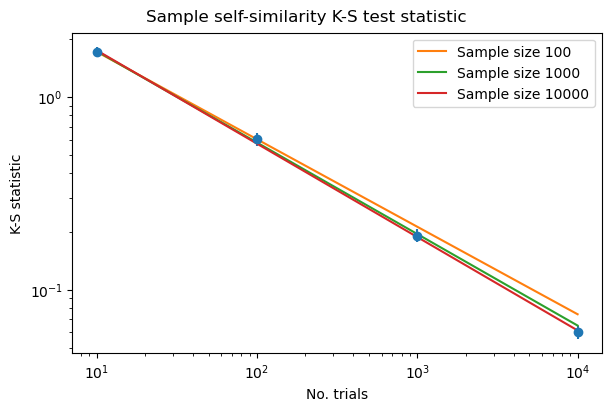

In [18]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()